# **Introdaction**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import scipy.stats as stats
from scipy.stats import f_oneway


dt = pd.read_csv('google_play_store_dataset.csv')

# **Dataset Description**

- App - Name of the application

- Category - Category to which the application belongs

- Rating - Rating given to the application by users

- Reviews - Number of user reviews for the application

- Size - Size of the application in megabytes

- Installs - Number of application installations

- Type - Type of application: Paid or Free

- Price - Price of the application

- Content Rating - Age rating of the application

- Genres - Genre of the application (a more detailed category)

- Last Updated - Date of the last update

- Current Ver - Current version of the application

- Android Ver - Minimum Android version required to run the application

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
dt.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17M,100+,Paid,$7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2805,"Moony Lab - Print Photos, Books & Magnets ™",PHOTOGRAPHY,4.7,1320,9.5M,"50,000+",Free,0,Everyone,Photography,"June 27, 2018",2.1.9,4.1 and up
1087,Alfa-Bank (Alfa-Bank),FINANCE,4.0,44545,Varies with device,"1,000,000+",Free,0,Everyone,Finance,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


In [ ]:
dt["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
dt["Rating"].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
dt["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
dt["Type"].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
dt["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
dt["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
dt["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

# **Cleaning**

In [ ]:
dt.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


The dataset has 1,474 apps with no ratings. This means users haven’t experienced them yet. We can’t set these missing ratings to 0 or delete them because they make up more than 7% of the total data.

In [ ]:
dt['Price'] = dt['Price'].replace('Everyone', np.nan)
dt['Price'] = dt['Price'].str.replace('$', '', regex=False).astype(float)
dt['Price'] = dt['Price'].fillna(0)

To calculate the Pearson correlation coefficient and perform other mathematical operations, we will convert the size of all apps to bytes and remove ambiguous values

In [ ]:
def change_size(size):
    try:
        if size == 'Varies with device':
            return np.nan
        if 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024  # МБ в байты
        if 'k' in size:
            return float(size.replace('k', '')) * 1024  # КБ в байты
        return float(size)
    except (ValueError, TypeError):
        return np.nan

dt['Size'] = dt['Size'].apply(change_size)
mean_size = dt['Size'].mean()
dt['Size'] = dt['Size'].fillna(mean_size)

We have apps with an incorrect category

In [ ]:
dt['Category'] = dt['Category'].astype(str).str.strip()
dt = dt[dt['Category'] != '1.9']
dt = dt.drop_duplicates()
print(dt['Category'].value_counts())

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64


In [ ]:
dt = dt[dt['Content Rating'] != 'Unrated']
print(dt['Content Rating'].value_counts())

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Name: count, dtype: int64


In [ ]:
dt['Installs'] = dt['Installs'].str.replace(r'[^0-9]', '', regex=True)
dt['Installs'] = pd.to_numeric(dt['Installs'], errors='coerce')

In [ ]:
def clean_type(row):
    if row['Type'] not in ['free', 'paid']:
        if row['Price'] == 0:
            return 'free'
        else:
            return 'paid'
    else:
        return row['Type']

dt['Type'] = dt.apply(clean_type, axis=1)

In [ ]:
def clean_size(size_str):
    if isinstance(size_str, str):
        if 'M' in size_str:
            return float(size_str.replace('M', ''))
        elif 'k' in size_str:
            return float(size_str.replace('k', '')) / 1024
        elif size_str == 'Varies with device':
            return np.nan
    return size_str


dt['Size'] = dt['Size'].apply(clean_size)

# **Visualization**

Making representation based on the following aspects:

- Distribution of apps by rating
- Distribution by categories
- Distribution by number of downloads
- Distribution by age ratings
- Distribution by genres
- Distribution by price

**RATING**

In [ ]:
print(dt['Rating'].describe())

count    10355.000000
mean         3.595799
std          1.537385
min          0.000000
25%          3.700000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64


What range do most apps fall into, and how does the overall market distribution look in terms of rating?

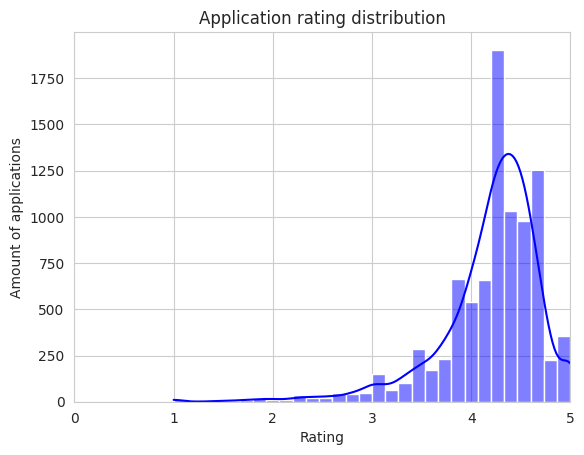

In [ ]:
sns.histplot(data=dt, x='Rating', bins=30, kde=True, color='blue')
plt.title('Application rating distribution')
plt.xlabel('Rating')
plt.ylabel('Amount of applications')
plt.xlim(0, 5)
plt.show()

What is the average rating within each category?

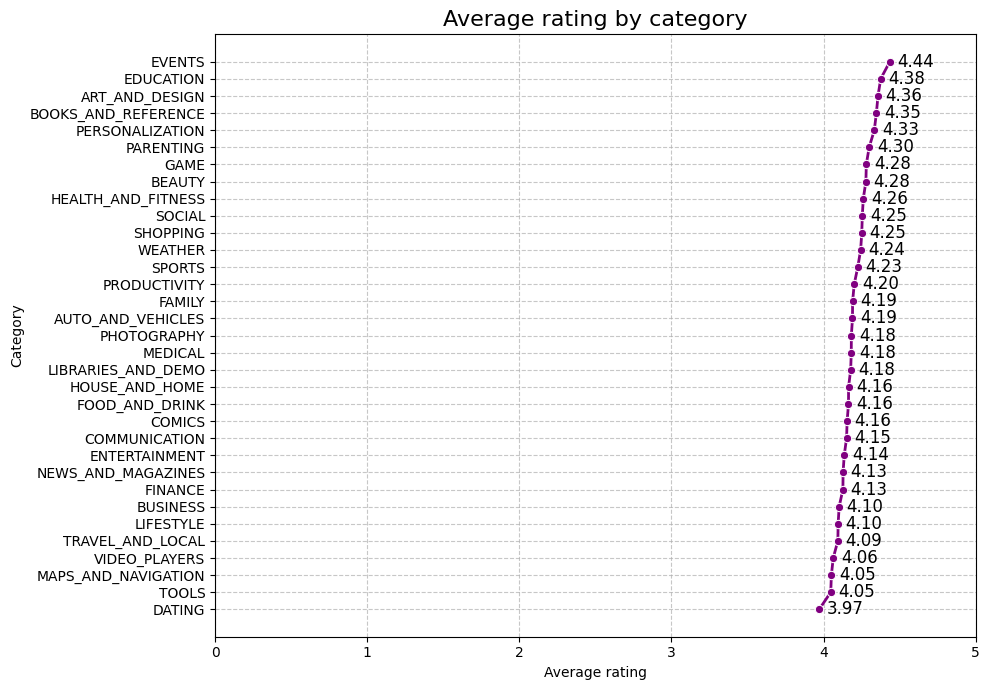

In [ ]:
avg_rating = dt.groupby('Category')['Rating'].mean()
avg_rating = avg_rating.sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.lineplot(
    x=avg_rating.values,
    y=avg_rating.index,
    marker='o',
    color='purple',
    linewidth=2
)

for i, value in enumerate(avg_rating.values):
    plt.text(value + 0.05, i, f'{value:.2f}', va='center', fontsize=12, color='black')

plt.title('Average rating by category', fontsize=16)
plt.xlabel('Average rating')
plt.ylabel('Category')
plt.xlim(0, 5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
top_5 = dt.nlargest(5, 'Rating')[['App', 'Category', 'Rating']]
bottom_5 = dt.nsmallest(5, 'Rating')[['App', 'Category', 'Rating']]

print("Apps with the highest rating:")
print(top_5)
print("Apps with the lowest rating:")
print(bottom_5)

Apps with the highest rating:
                                            App Category  Rating
329                Hojiboy Tojiboyev Life Hacks   COMICS     5.0
612               American Girls Mobile Numbers   DATING     5.0
615                                Awake Dating   DATING     5.0
633                       Spine- The dating app   DATING     5.0
636  Girls Live Talk - Free Text and Video Chat   DATING     5.0
Apps with the lowest rating:
                                   App Category  Rating
625            House party - live chat   DATING     1.0
4127                 Speech Therapy: F   FAMILY     1.0
5151                     Clarksburg AH  MEDICAL     1.0
5978     Truck Driving Test Class 3 BC   FAMILY     1.0
6319  BJ Bridge Standard American 2018     GAME     1.0


What is the average price of apps with rating > 4.5?

In [ ]:
dt[dt["Rating"] > 4.5].groupby("Rating")["Price"].agg(["mean","count"])

,mean,count
Rating,,
4.6,0.481042,768
4.7,0.486364,484
4.8,0.638860,228
4.9,0.217701,87
5.0,0.376494,271


**INSTALLS**

General information about the column

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
info = dt['Installs'].describe()
round_inf = info.copy()
round_inf['count'] = int(info['count'])
round_inf = round_inf.apply(lambda x: round(x, 2))

print(round_inf)

count        10355.00
mean      14160489.04
std       80247062.69
min              0.00
25%           1000.00
50%         100000.00
75%        1000000.00
max     1000000000.00
Name: Installs, dtype: float64


Which categories have the highest number of downloads

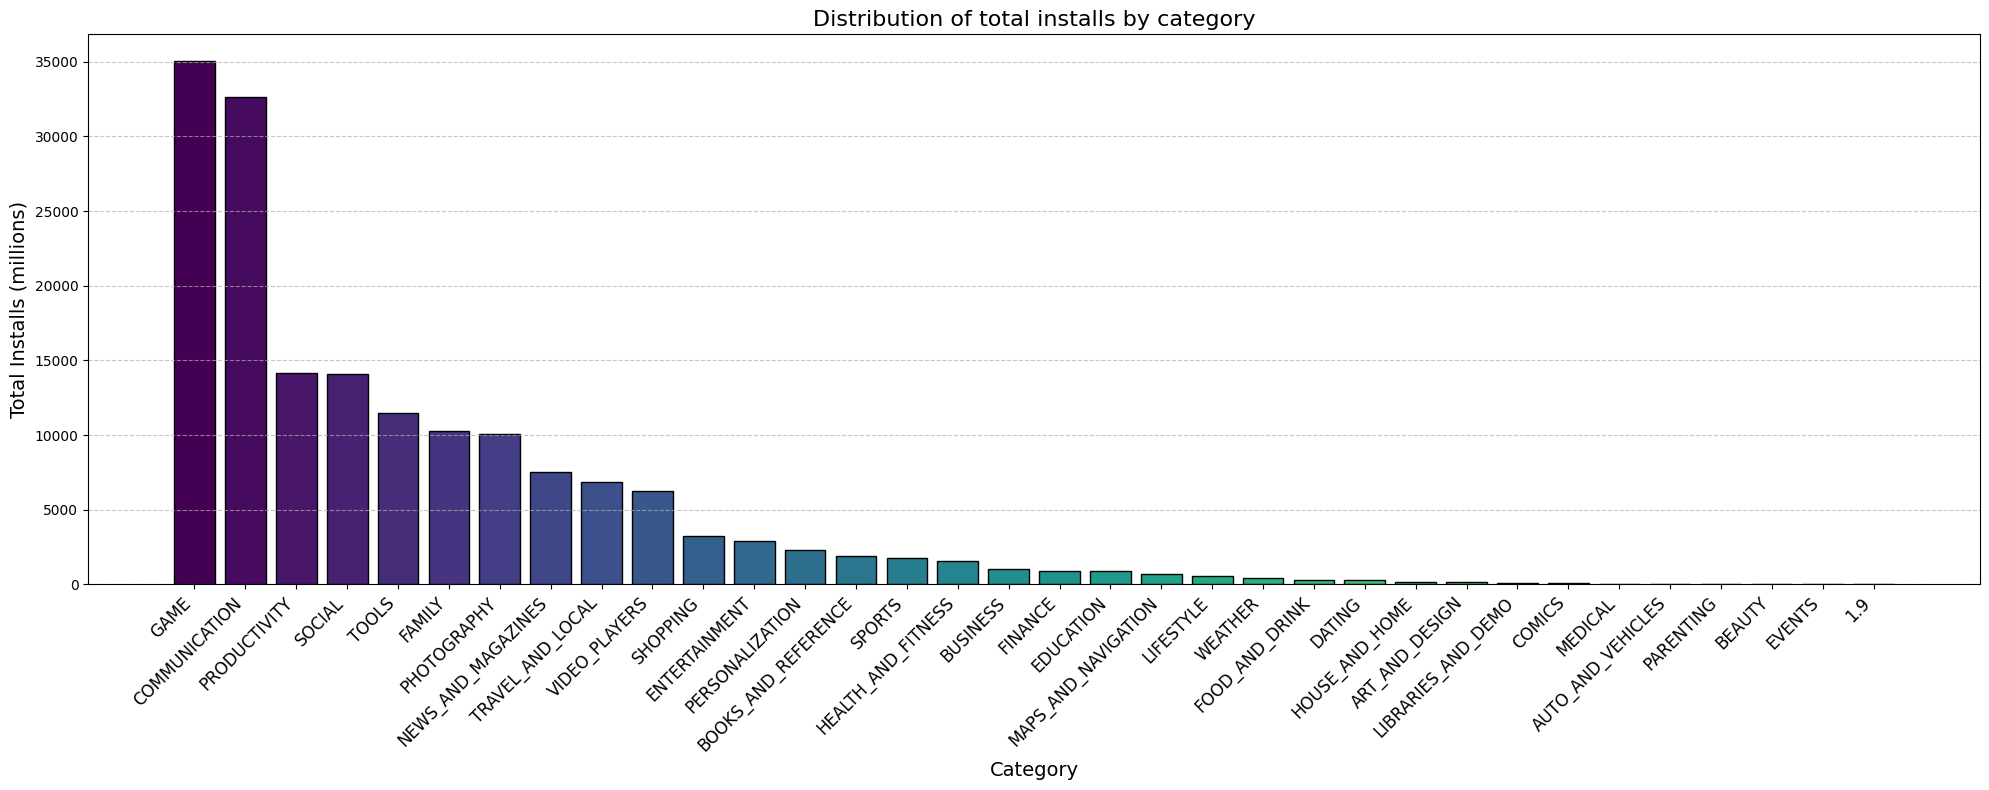

In [ ]:
plt.figure(figsize=(20, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(category_installs)))

bars = plt.bar(category_installs['Category'], category_installs['Installs'], color=colors, edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Installs (millions)', fontsize=14)
plt.title('Distribution of total installs by category', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.xticks(rotation=45, fontsize=12, ha='right')

plt.tight_layout()
plt.show()

What does the distribution look like in percentage terms?

In [ ]:
table = pd.pivot_table(dt, values='Installs', index='Category', aggfunc='sum')
total_installs = table['Installs'].sum()
table['Percentage'] = (table['Installs'] / total_installs) * 100
table = table.sort_values(by='Percentage', ascending=False)
table['Percentage'] = table['Percentage'].round(2).astype(str) + '%'

print(table)

                        Installs Percentage
Category                                   
GAME                 31544024415     21.51%
COMMUNICATION        24152276251     16.47%
SOCIAL               12513867902      8.53%
PRODUCTIVITY         12463091369       8.5%
TOOLS                11452721915      7.81%
FAMILY               10041692005      6.85%
PHOTOGRAPHY           9721247655      6.63%
TRAVEL_AND_LOCAL      6361887146      4.34%
VIDEO_PLAYERS         6222002720      4.24%
NEWS_AND_MAGAZINES    5393217760      3.68%
SHOPPING              2573348785      1.75%
ENTERTAINMENT         2455660000      1.67%
PERSONALIZATION       2074494782      1.41%
BOOKS_AND_REFERENCE   1916469576      1.31%
SPORTS                1528574498      1.04%
HEALTH_AND_FITNESS    1361022512      0.93%
BUSINESS               863664865      0.59%
FINANCE                770348734      0.53%
MAPS_AND_NAVIGATION    724281890      0.49%
LIFESTYLE              534823539      0.36%
EDUCATION              533952000

Which genres have the highest number of downloads?

In [ ]:
category_installs = dt.groupby('Genres')['Installs'].sum()
total_installs = category_installs.sum()
percentage_installs = (category_installs / total_installs) * 100
percentage_installs = percentage_installs.sort_values(ascending=False)

print(percentage_installs)

Genres
Communication                  16.47
Social                          8.53
Productivity                    8.50
Tools                           7.80
Photography                     6.63
                                ... 
Books & Reference;Education     0.00
Books & Reference;Creativity    0.00
Board;Pretend Play              0.00
Trivia;Education                0.00
Role Playing;Education          0.00
Name: Installs, Length: 119, dtype: float64


**CONTENT RATING**

What is the total number of apps within each age category?



In [ ]:
content_rating = dt['Content Rating'].value_counts()
print(content_rating)

Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Name: count, dtype: int64


<ipython-input-38-bf475483b592>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_rating.values,


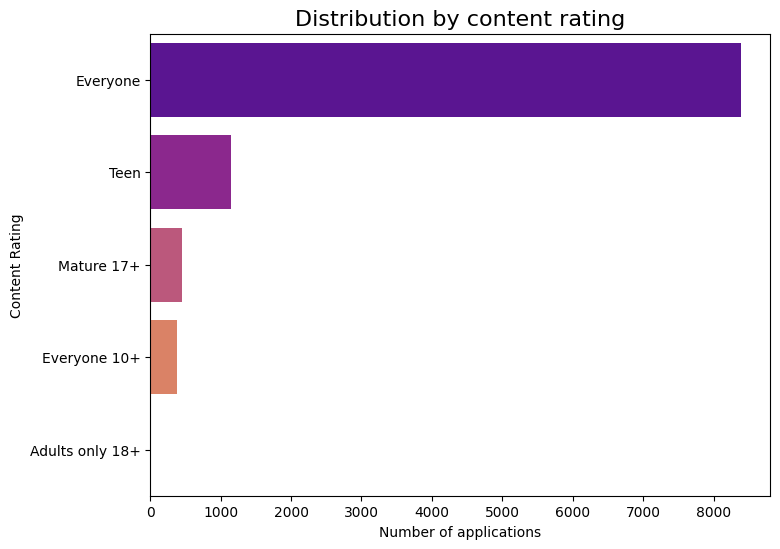

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=content_rating.values,
            y=content_rating.index,
            palette='plasma')

plt.title('Distribution by content rating', fontsize=16)
plt.xlabel('Number of applications')
plt.ylabel('Content Rating')
plt.show()

**GENRES**

In [ ]:
app_count_genre = dt['Genres'].value_counts()
print(app_count_genre)

Genres
Tools                                842
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64


In [ ]:
genres = dt['Genres'].value_counts()
genre_percent = (genres/genres.sum()) * 100
print("Amount of applications by genre as a percentage:")
print(genre_percent.round(2).astype(str) + '%')


Amount of applications by genre as a percentage:
Genres
Tools                                8.13%
Entertainment                        5.68%
Education                            5.09%
Business                             4.12%
Medical                              3.94%
                                     ...  
Parenting;Brain Games                0.01%
Travel & Local;Action & Adventure    0.01%
Lifestyle;Pretend Play               0.01%
Tools;Education                      0.01%
Strategy;Creativity                  0.01%
Name: count, Length: 119, dtype: object


**PRICE**

What is the distribution of paid and free apps in percentage terms?

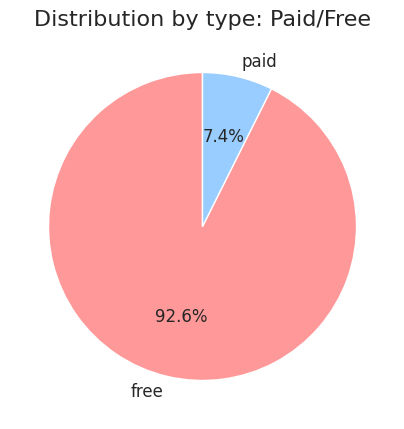

In [ ]:
app_type = dt['Type'].value_counts()
colors = ['#FF9999', '#99CCFF']
plt.figure(figsize=(5, 5))
plt.pie(
    app_type.values,
    labels=app_type.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title('Distribution by type: Paid/Free', fontsize=16)
plt.show()

Number of paid apps within each content rating category.

In [ ]:
paid_apps = dt[dt['Price'] > 0]
paid_apps_rating = paid_apps.groupby('Content Rating').size()
print(paid_apps_rating)

Content Rating
Everyone        662
Everyone 10+     32
Mature 17+       19
Teen             52
dtype: int64


Number of paid apps based on categories

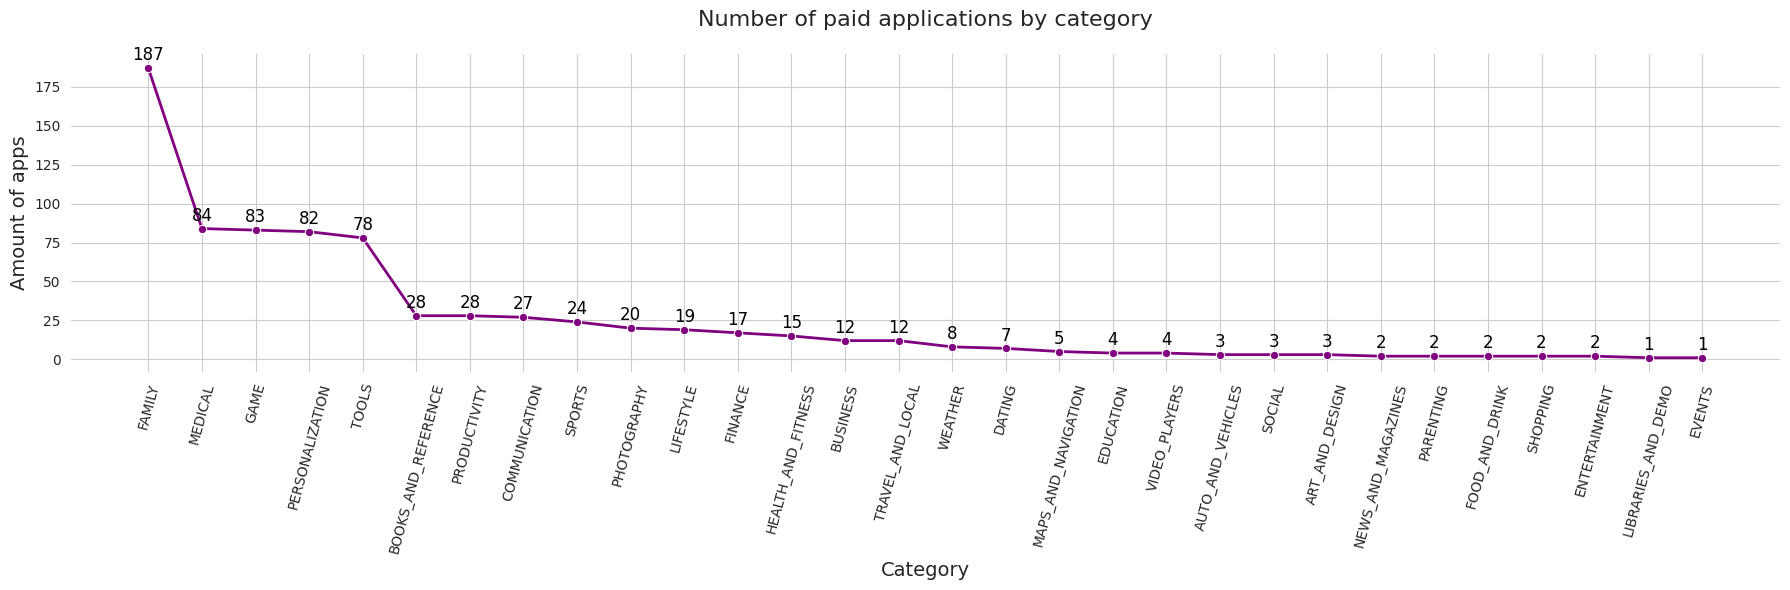

In [ ]:
paid_apps = dt[dt['Price'] > 0]
paid_apps_category = paid_apps.groupby('Category').size()
paid_apps_category_sorted = paid_apps_category.sort_values(ascending=False)
sns.set_style("whitegrid")

plt.figure(figsize=(18, 6))
sns.lineplot(
    x=paid_apps_category_sorted.index,
    y=paid_apps_category_sorted.values,
    marker='o',
    color='purple',
    linewidth=2
)

for i, value in enumerate(paid_apps_category_sorted.values):
    plt.text(i, value + 5, f'{value}', ha='center', fontsize=12, color='black')

plt.title('Number of paid applications by category', fontsize=16, pad=20)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Amount of apps', fontsize=14)
plt.xticks(rotation=75)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Average price within each category

In [ ]:
avg_price_by_category = dt.groupby('Category')['Price'].mean()
avg_price_by_category = avg_price_by_category.sort_values(ascending=False)
print(avg_price_by_category)

Category
FINANCE                6.912989
LIFESTYLE              5.271183
MEDICAL                2.016437
EVENTS                 1.718594
FAMILY                 1.245921
BOOKS_AND_REFERENCE    0.520739
BUSINESS               0.411479
WEATHER                0.395366
PERSONALIZATION        0.387545
PHOTOGRAPHY            0.379596
TOOLS                  0.317399
SPORTS                 0.284900
GAME                   0.256289
PRODUCTIVITY           0.236305
COMMUNICATION          0.227158
HEALTH_AND_FITNESS     0.210294
MAPS_AND_NAVIGATION    0.196715
TRAVEL_AND_LOCAL       0.194746
DATING                 0.160357
PARENTING              0.159667
AUTO_AND_VEHICLES      0.158471
EDUCATION              0.138154
ART_AND_DESIGN         0.093281
ENTERTAINMENT          0.071892
FOOD_AND_DRINK         0.068387
VIDEO_PLAYERS          0.059771
SHOPPING               0.024464
NEWS_AND_MAGAZINES     0.015133
LIBRARIES_AND_DEMO     0.011647
SOCIAL                 0.007122
COMICS                 0.000000

Average price by category based on the number of downloads

In [ ]:
pd.pivot_table(data=dt, index="Category", values="Price", columns="Installs", aggfunc="mean")

Installs,1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000
Category,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,NaN,NaN,NaN,NaN,0.000000,NaN,0.663333,0.398000,0.180909,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
AUTO_AND_VEHICLES,0.000000,0.000000,0.000000,9.990000,0.248333,0.000000,0.000000,0.000000,0.000000,0.398000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
BEAUTY,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
BOOKS_AND_REFERENCE,5.990000,1.852857,3.996842,0.583333,0.570000,0.220000,0.149118,0.474375,0.179600,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,0.0,NaN,0.0
BUSINESS,0.000000,0.055000,2.201905,0.359600,0.432763,0.782174,0.183265,0.000000,0.065000,0.000000,0.332667,0.000000,0.000000,0.0,0.000000,0.0,0.0,NaN,NaN
COMICS,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
COMMUNICATION,0.000000,0.000000,1.392105,0.000000,0.210606,0.906364,0.294091,0.393158,0.478400,0.000000,0.572632,0.000000,0.066444,0.0,0.000000,0.0,0.0,0.0,0.0
DATING,0.000000,0.000000,0.000000,0.248333,0.880588,0.000000,0.537692,0.000000,0.362727,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
EDUCATION,NaN,NaN,NaN,NaN,NaN,NaN,4.990000,NaN,0.000000,0.000000,0.190000,0.306923,0.000000,0.0,0.000000,NaN,0.0,NaN,NaN


Apps with the highest rating, along with their price and category

In [ ]:
filtered = dt[dt["Rating"] == 5]
sorted = filtered.sort_values(by="Price", ascending=False)
top_5_apps = sorted.head(5)
print(top_5_apps[["App", "Price", "Rating", "Category"]])

                                            App  Price  Rating Category
5489                  AP Art History Flashcards  29.99     5.0   FAMILY
7477                 USMLE Step 2 CK Flashcards  19.99     5.0   FAMILY
5246                      Hey AJ! It's Bedtime!   4.99     5.0   FAMILY
5482                 meStudying: AP English Lit   4.99     5.0   FAMILY
7204  TI-84 CE Graphing Calculator Manual TI 84   4.99     5.0   FAMILY


In [ ]:
filter = dt[dt["Rating"] >= 4.5]
sorted = filter.sort_values(by="Price", ascending=False)
top_5_apps = sorted.head(10)
print(top_5_apps[["App", "Price", "Rating", "Category"]])

                                                   App  Price  Rating Category
2253                         Vargo Anesthesia Mega App  79.99     4.6  MEDICAL
5489                         AP Art History Flashcards  29.99     5.0   FAMILY
9574  Human Anatomy Atlas 2018: Complete 3D Human Body  24.99     4.5  MEDICAL
2251  Human Anatomy Atlas 2018: Complete 3D Human Body  24.99     4.5  MEDICAL
8719                                 DRAGON QUEST VIII  19.99     4.5   FAMILY
7477                        USMLE Step 2 CK Flashcards  19.99     5.0   FAMILY
2297                              Hospitalist Handbook  19.99     4.8  MEDICAL
7347                           boattheory.ch Full 2018  19.40     4.7   FAMILY
5361                            I am Rich Premium Plus  18.99     4.6  FINANCE
4203                           The World Ends With You  17.99     4.6     GAME


Average price of apps with a rating above 4.7

In [ ]:
need = dt[dt["Rating"] > 4.7]
num_apps = need.shape[0]
avg_price = need["Price"].mean()

print(f"Number of apps with a rating greater than 4.7: {num_apps}")
print(f"Average price of these apps: {avg_price:.2f}")

Number of apps with a rating greater than 4.7: 586
Average price of these apps: 0.46


# **Additional Analysis**

Pearson correlation matrix:
            Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.080460  0.081969  0.054361 -0.021924
Reviews   0.080460  1.000000  0.240103  0.632040 -0.010010
Size      0.081969  0.240103  1.000000  0.167032 -0.026822
Installs  0.054361  0.632040  0.167032  1.000000 -0.010622
Price    -0.021924 -0.010010 -0.026822 -0.010622  1.000000


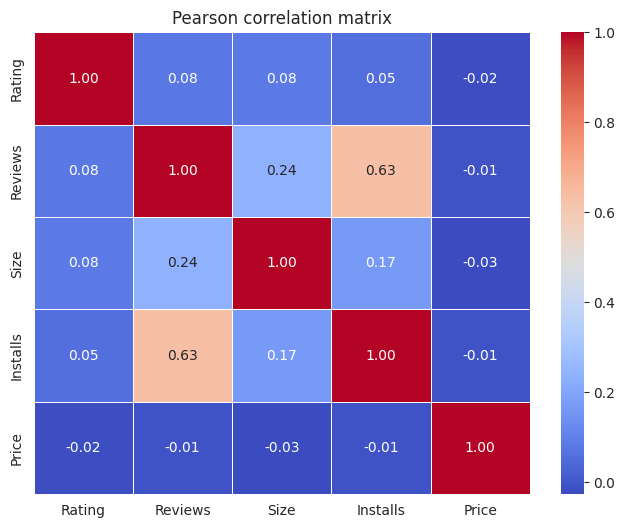

In [ ]:
columns_corr = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
corr_data = dt[columns_corr]
corr_data = corr_data.dropna()
corr_matrix = corr_data.corr(method='pearson')
print("Pearson correlation matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson correlation matrix')
plt.show()

In [ ]:
table = pd.crosstab(dt['Category'], dt['Content Rating'])
chi2, _, _, _ = stats.chi2_contingency(table)
n = table.sum().sum()
phi2 = chi2 / n
r, k = table.shape
cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))
print(f"Cramér's V: {cramers_v:.2f}")

Cramér's V: 0.35


In [ ]:
table = pd.crosstab(dt['Category'], dt['Type'])
chi2, _, _, _ = stats.chi2_contingency(table)
n = table.sum().sum()
phi2 = chi2 / n
r, k = table.shape
cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))
print(f"Cramér's V: {cramers_v:.2f}")

Cramér's V: 0.72
